# Desafío - Gráficos
## Cristian Vidal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('qog_std_cs_jan18.csv');

### 1. Genere una submuestra de casos

* Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria

In [3]:
semilla_pseudoaleatoria = 4968

* Seleccione el 50% de los casos
* Cada base generada debe contener los siguientes elementos:
    * El índice de desarrollo humano ( undp_hdi )
    * El nombre del país ( ccodealp )
    * La región a la que pertenece ( ht_region )
    * El PIB per capita. ( gle_cgdpc )
    * El total de la población ( imf_pop )
* Si su apellido está entre la N y la Z, escoja las siguientes variables del módulo Salud:
    * wef_imort : Infant mortality, deaths/1000 live births
    * who_alc2000 : Alcohol consumption per capita (2000-)
    * who_tobt : Current smoking of any tobacco product (Total).
    * wdi_exph : Government expenditure on health, total (% of GDP)
* Guarde esta tabla procesada en un nuevo objeto

In [4]:
submuestra_pseudoaleatoria = df.sample(frac=0.5, random_state=semilla_pseudoaleatoria)
submuestra = submuestra_pseudoaleatoria.loc[:,['undp_hdi', 'ccodealp', 'cname', 'ht_region', 
                                                'gle_cgdpc', 'imf_pop', 'wef_imort',
                                                'who_alc2000', 'who_tobt', 'wdi_exph']]

In [5]:
submuestra.sample(10)

undp_hdi ccodealp                          cname  ht_region   gle_cgdpc  \
158     0.888      SVN                       Slovenia          1  24456.5610   
36      0.734      CHN                          China          6   9283.3799   
51      0.739      ECU                        Ecuador          2   7259.5200   
95      0.495      LSO                        Lesotho          4   1539.7900   
13      0.741      ARM                        Armenia          1   6451.9399   
140     0.603      TLS                    Timor-Leste          7   1957.8101   
98      0.719      LBY                          Libya          3   4102.8398   
107     0.853      MLT                          Malta          5  24094.6410   
29      0.514      CMR                       Cameroon          4   2658.5100   
147     0.720      VCT  St Vincent and the Grenadines         10   7454.8799   

     imf_pop  wef_imort  who_alc2000   who_tobt   wdi_exph  
158    2.061   2.500000        10.46  20.900000   9.233887  
36       NaN  12.100000         5.78  25.900000   5.548228  
51    15.775  19.100000         3.82   9.000000   9.161088  
95       NaN  74.199997         2.39  25.400000  10.617677  
13     2.980  14.700000         3.91  28.000000   4.480149  
140    1.146  47.799999         0.50        NaN   1.475303  
98     6.266  13.200000         0.00        NaN   4.968935  
107    0.425   5.800000         8.49  25.900000   9.749920  
29       NaN  61.099998         6.19  18.799999   4.103672  
147    0.110        NaN         7.01        NaN   8.630239

#### Renombre las categorías de la variable ht_region de números a regiones

In [6]:
submuestra['region_recod'] = submuestra['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                                            ['EastEurope', 'LatAm', 'NorthAfrica',
                                                            'SubSaharian', 'WesternDem', 'EastAsia',
                                                            'SouthEastAsia','SouthAsia','Pacific', 
                                                            'Caribbean' ])

In [7]:
submuestra.sample(5)

undp_hdi ccodealp         cname  ht_region   gle_cgdpc  imf_pop  \
187     0.399      BFA  Burkina Faso          4   1095.9600   16.500   
65      0.575      GHA         Ghana          4   2584.6001      NaN   
101     0.896      LUX    Luxembourg          5  61404.4800    0.550   
188     0.794      URY       Uruguay          2  12804.8400    3.454   
107     0.853      MLT         Malta          5  24094.6410    0.425   

     wef_imort  who_alc2000   who_tobt  wdi_exph region_recod  
187  65.800003         4.64  19.100000  4.960263  SubSaharian  
65   48.599998         1.64   6.300000  3.557292  SubSaharian  
101   1.700000        11.12  24.400000  6.937873   WesternDem  
188   6.200000         6.03  24.799999  8.581491        LatAm  
107   5.800000         8.49  25.900000  9.749920   WesternDem

### 2. Genere una función que ingrese su objeto y devuelva:

* Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos contínuos
* Para cada variable discreta, que calcule la frecuencia.

In [8]:
def calcular_medidas_descriptivas(objeto):
    """
    calcular_medidas_descriptivas:
        Función que permite calcular las medidas descriptivas para los casos contínuos 
        o la frecuencias absolutas para las variables discretas.
    parameters:
        objeto: objeto tipo DataFrame
    returns:
        medidas descriptivas o frecuencias absolutas
    """
    
    variables_continuas = ['float64', 'int64']
    variables_discretas = ['object']
    
    for nombre_columna, serie in objeto.iteritems():
        if isinstance(serie, pd.Series):
            print(nombre_columna, serie.dtypes)
            print('*************************************************************')
            if serie.dtype in variables_continuas:
                # vamos a eliminar los datos perdidos en la columna
                serie = serie.dropna()
                print(round(serie.describe(),2))
            if serie.dtype in variables_discretas:
                print(serie.value_counts())

In [9]:
calcular_medidas_descriptivas(submuestra)

undp_hdi float64
*************************************************************
count    94.00
mean      0.71
std       0.14
min       0.40
25%       0.60
50%       0.74
75%       0.80
max       0.95
Name: undp_hdi, dtype: float64
ccodealp object
*************************************************************
MDG    1
CRI    1
LBN    1
LKA    1
UKR    1
HTI    1
PRT    1
BHS    1
ROU    1
BEL    1
TWN    1
EGY    1
TTO    1
TUN    1
COM    1
ALB    1
CMR    1
KOR    1
SLB    1
MLT    1
KGZ    1
USA    1
LVA    1
GRD    1
HRV    1
MKD    1
SUR    1
LIE    1
PNG    1
TLS    1
      ..
CHL    1
SMR    1
SWZ    1
QAT    1
GBR    1
AUT    1
GHA    1
BLR    1
NAM    1
SLV    1
NGA    1
UGA    1
CPV    1
LSO    1
LCA    1
BFA    1
GMB    1
LBY    1
BRB    1
AZE    1
STP    1
BLZ    1
MUS    1
NLD    1
BRN    1
ISL    1
LUX    1
NOR    1
BHR    1
BTN    1
Name: ccodealp, Length: 97, dtype: int64
cname object
*************************************************************
Turkmenistan              1

#### Reporte las estadísticas descriptivas para gle_cgdpc , undp_hdi , imf_pop  (Muestra de los 50% de los casos)

#####  gle_cgdpc

* El promedio PIB per capita es de aproximadamente 16390.70.
* El 50% de los paises tienen un PIB per capita  menor que o igual a 9051.72, mientras que el otro 50% de los paises tienen un PIB per capita mayor que o igual a 9051.72.
* El PIB per capita de los paises de la muestra tiene una desviación, en promedio de 21470.27 respecto a la media.

##### undp_hdi

* El promedio del índice de desarrollo humano es de aproximadamente 0.71.
* El 50% de los paises tienen un índice de desarrollo humano menor que o igual a 0.74, mientras que el otro 50% de los paises tienen un índice de desarrollo humano mayor que o igual a 0.74.
* El índice de desarrollo humano de los paises de la muestra tiene una desviación, en promedio de 0.14 respecto a la media.

##### imf_pop

* El promedio del total de la población es de aproximadamente 22.37.
* El 50% de los paises tienen un total de la población menor que o igual a 4.38, mientras que el otro 50% de los paises tienen un total de la población mayor que o igual a 4.38.
* El total de la población de los paises de la muestra tiene una desviación, en promedio de 50.32 respecto a la media.

### 3. Genere una función que liste las observaciones perdidas de una variable

* La función debe contener los siguientes argumentos:
    * dataframe : La función debe ingresar un objeto DataFrame.
    * var : Variable a inspeccionar.
    * print_list : Opción para imprimir la lista de observaciones perdidas en la variable. Debe ser False por defecto.

In [10]:
def observaciones_perdidas(dataframe, var, print_list=False):
    """
    observaciones_perdidas:
        Función que permite listar las observaciones perdidas de una variable
    parameters:
        dataframe: objeto DataFrame.
        var: Variable a inspeccionar.
        print_list : Opción para imprimir la lista de observaciones perdidas en la variable, 
        por defecto es False.
    return:
        cantidad de casos perdidos, porcentaje correspondiente
    """
    # Cuando print_list = True , debe retornar la lista de casos
    if print_list:
        return dataframe[dataframe[var].isna()]
    
    # La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente
    cantidad = dataframe[var].isnull().sum()
    porcentaje = cantidad / len(dataframe)
    resultado = {"cantidad": cantidad, "porcentaje": round(porcentaje, 2), 'tipo': dataframe[var].dtypes}
    return resultado

<b>La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.</b>

In [11]:
observaciones_perdidas(submuestra, 'undp_hdi')

{'cantidad': 3, 'porcentaje': 0.03, 'tipo': dtype('float64')}

<b>Cuando print_list = True , debe retornar la lista de casos.</b>

In [12]:
observaciones_perdidas(submuestra, 'undp_hdi', True)

undp_hdi ccodealp       cname  ht_region   gle_cgdpc  imf_pop  wef_imort  \
37        NaN      TWN      Taiwan          6   33965.871   23.434   3.934564   
148       NaN      SMR  San Marino          5   42664.211    0.034        NaN   
111       NaN      MCO      Monaco          5  108481.130      NaN        NaN   

     who_alc2000  who_tobt  wdi_exph region_recod  
37           NaN       NaN       NaN     EastAsia  
148          NaN       NaN  6.129065   WesternDem  
111          NaN       NaN  4.337683   WesternDem

<b>Analice todas las variables y sus casos perdidos</b>

In [13]:
for variable in submuestra.columns:
    print(variable, observaciones_perdidas(submuestra, variable))

undp_hdi {'cantidad': 3, 'porcentaje': 0.03, 'tipo': dtype('float64')}
ccodealp {'cantidad': 0, 'porcentaje': 0.0, 'tipo': dtype('O')}
cname {'cantidad': 0, 'porcentaje': 0.0, 'tipo': dtype('O')}
ht_region {'cantidad': 0, 'porcentaje': 0.0, 'tipo': dtype('int64')}
gle_cgdpc {'cantidad': 1, 'porcentaje': 0.01, 'tipo': dtype('float64')}
imf_pop {'cantidad': 26, 'porcentaje': 0.27, 'tipo': dtype('float64')}
wef_imort {'cantidad': 19, 'porcentaje': 0.2, 'tipo': dtype('float64')}
who_alc2000 {'cantidad': 6, 'porcentaje': 0.06, 'tipo': dtype('float64')}
who_tobt {'cantidad': 36, 'porcentaje': 0.37, 'tipo': dtype('float64')}
wdi_exph {'cantidad': 2, 'porcentaje': 0.02, 'tipo': dtype('float64')}
region_recod {'cantidad': 0, 'porcentaje': 0.0, 'tipo': dtype('O')}


<b>Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con
ausencia de datos.</b>

In [14]:
for variable in ['wef_imort', 'imf_pop', 'who_tobt']:
    print(variable)
    print(submuestra[submuestra[variable].isna()]['cname']) # ccodealp
    print('*************************************************************')

wef_imort
27                           Belarus
10                           Bahamas
173                            Tonga
66                          Kiribati
39                           Comoros
68                           Grenada
5                Antigua and Barbuda
99                     Liechtenstein
40                             Congo
130                            Palau
178                     Turkmenistan
148                       San Marino
111                           Monaco
149            Sao Tome and Principe
22                   Solomon Islands
146                         St Lucia
133                 Papua New Guinea
164                    Sudan (2012-)
147    St Vincent and the Grenadines
Name: cname, dtype: object
*************************************************************
imf_pop
118                  Namibia
72                     Haiti
97                   Liberia
69                 Guatemala
68                   Grenada
5        Antigua and Barbuda
36              

### 4. Grafique los histogramas

Genere una función que grafique un histograma en conjunto y señale las medias. La función debe incluír los siguientes argumentos:
* dataframe : La base de datos donde se encuentran los datos específicos.
* var : La variable a graficar.
* sample_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral. Por defecto debe ser False .
* true_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa.

In [15]:
def crear_histograma(dataframe, var, sample_mean=False, true_mean=False):
    """
    crear_histograma:
        Función que permite crear un histograma
    parameters:
        dataframe : La base de datos donde se encuentran los datos específicos.
        var : La variable a graficar.
        sample_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la
        media de la variable en la selección muestral. Por defecto debe ser False.
        true_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la
        media de variable en la base de datos completa.
    returns:
        histograma
    """
    # Limpiar muestra
    muestra = dataframe[var].dropna()
    
    # Si es verdadero, debe generar una recta vertical indicando la media de la variable en la sel. muestral
    if sample_mean:
        plt.axvline(muestra.mean(), 
                    lw=3, 
                    color='tomato', 
                    linestyle='--', 
                    label=f"Media Sel. Muestral ({round(muestra.mean(), 2)}%)")
        plt.legend()

    # Si es verdadero, debe generar una recta vertical indicando la media de variable en la bd completa
    if true_mean:
        muestra_completa = df[var].dropna()
        plt.axvline(muestra_completa.mean(), 
                    lw=3,
                    color='green', 
                    linestyle='--', 
                    label=f"Media Muestra Global ({round(muestra_completa.mean(), 2)}%)")
        plt.legend()

    plt.hist(muestra, color='lightgrey')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

<b>Implemente las funciones para las 4 variables seleccionadas según su grupo.</b>

HISTOGRAMA VARIABLE "WEF_IMORT"


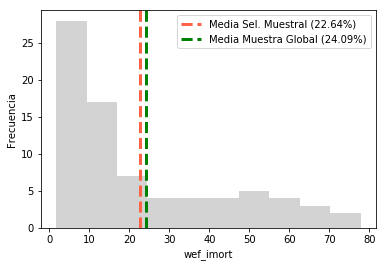

HISTOGRAMA VARIABLE "WHO_ALC2000"


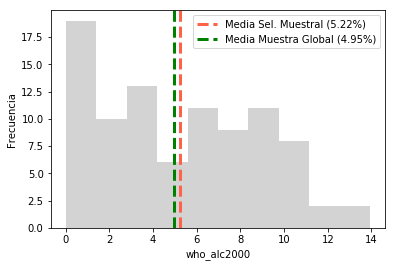

HISTOGRAMA VARIABLE "WHO_TOBT"


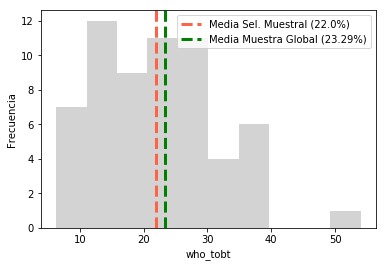

HISTOGRAMA VARIABLE "WDI_EXPH"


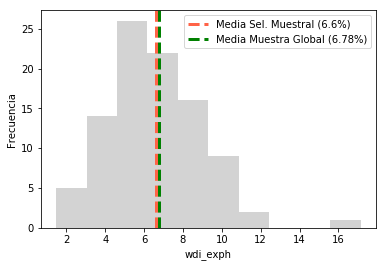

In [16]:
for variable in ['wef_imort','who_alc2000','who_tobt','wdi_exph']:
    print('HISTOGRAMA VARIABLE "{}"'.format(variable.upper()))
    crear_histograma(submuestra, variable, True, True)

<b>¿En qué variables la media de la submuestra es mayor a la de la muestra completa?</b>

Se puede observar que la variable <b>who_alc2000</b> la media de la submuestra es mayor a la de la muestra completa. Para las variables wef_imort, who_tobt y wdi_exph la media de la sumuestra es menor a la de la muestra completa.

### 5. Genere una función que devuelva un dotplot

La función debe contener los siguientes argumentos como argumentos:
* dataframe : La tabla de datos donde buscar las variables.
* plot_var : La variable a analizar y extraer las medias.
* plot_by : La variable agrupadora.
* global_stat : Booleano. Si es True debe graficar la media global de la variable. Por defecto debe ser False.
* statistic: Debe presentar dos opciones. mean para la media y median para la mediana.Por defecto debe ser mean .

In [17]:
def crear_dotplot(dataframe, plot_var, plot_by, global_stat=False, statistic='mean'):
    """
    crear_dotplot:
        Función que permite crear un dotplot
    parameters:
        dataframe : La tabla de datos donde buscar las variables.
        plot_var : La variable a analizar y extraer las medias.
        plot_by : La variable agrupadora.
        global_stat : Booleano. Si es True debe graficar la media global de la variable. Por
        defecto debe ser False .
        statistic: Debe presentar dos opciones. mean para la media y median para la mediana.
        Por defecto debe ser mean .
    returns:
        dotplot
    """
    # Medidas de tendencia variable
    variable = plot_var
    media_muestra = round(dataframe[variable].mean(),2);
    mediana_muestra = round(dataframe[variable].median(),2);
    media_global = round(df[variable].mean(),2);
    mediana_global = round(df[variable].median(),2);
    
    # Datos agrupados
    submuestra_agrupada = dataframe.groupby(plot_by)[variable]

    # mean para la media
    if statistic == 'mean':
        media_mediana_muestra = media_muestra;
        promedios_continentes = round(submuestra_agrupada.mean(),2)
        label_muestra = f"Media Sel. Muestral ({round(media_muestra, 2)}%)"
        
    # median para la mediana           
    if statistic == 'median':
        media_mediana_muestra = mediana_muestra;
        promedios_continentes = round(submuestra_agrupada.median(),2)
        label_muestra = f"Mediana Sel. Muestral ({round(mediana_muestra, 2)}%)"
    
    # Si es True debe graficar la media global de la variable
    if global_stat and  statistic is 'mean':
        plt.axvline(media_global,
                    lw=3,
                    color='green',
                    linestyle='--', 
                    label=f"Media Muestra Global ({round(media_global, 2)}%)")
        plt.legend()
        
    # Si es True debe graficar la mediana global de la variable
    if global_stat and  statistic is 'median':
        plt.axvline(mediana_global,
                    lw=3,
                    color='green',
                    linestyle='--', 
                    label=f"Mediana Muestra Global ({round(mediana_global, 2)}%)")
        plt.legend()
    
    # Graficar la media o mediana según valor de statistic
    plt.axvline(media_mediana_muestra,
                lw=3, 
                color='tomato', 
                linestyle='--', 
                label=label_muestra)
    
    # Crear dotplot
    plt.title('Dotplot variable {}'.format(variable))
    promedios = promedios_continentes.values
    continentes = promedios_continentes.index
    plt.plot(promedios, continentes, 's', color='#0066FF') 
    plt.legend()
    plt.show()

<b>Implemente la función en las 3 variables con una menor cantidad de datos perdidos</b>

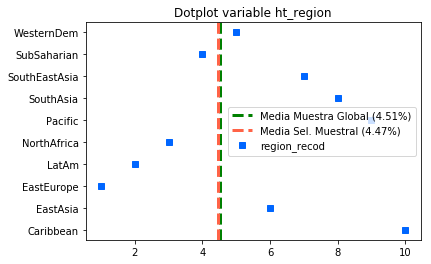

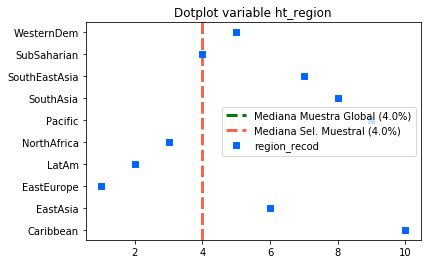

****************************************************************************


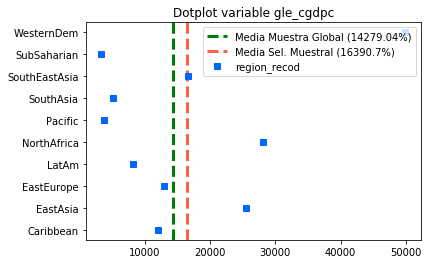

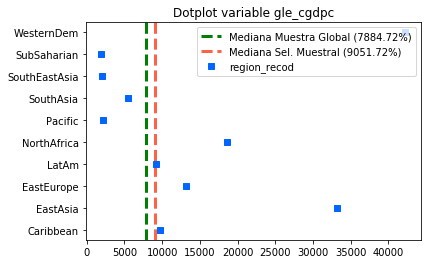

****************************************************************************


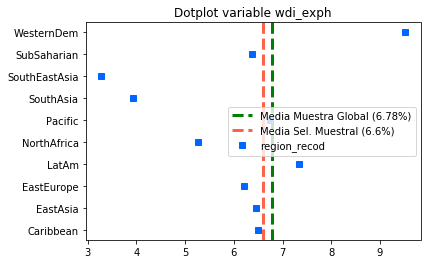

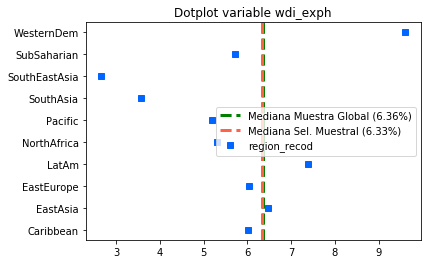

****************************************************************************


In [18]:
for variable in ['ht_region', 'gle_cgdpc', 'wdi_exph']:
    crear_dotplot(submuestra, variable, 'region_recod', True, 'mean')
    crear_dotplot(submuestra, variable, 'region_recod', True, 'median')
    print('****************************************************************************')

## 6. Guarde la base de datos

La submuestra creada tiene un método llamado to_csv . Acceda a éste y guarde la base subsample_<iniciales>_demo.csv . (Súbala a la plataforma, junto al desafío)

In [19]:
submuestra.to_csv('subsample_cvm_demo.csv')